<a href="https://colab.research.google.com/github/watersavvy/CV_Projects/blob/main/Dominant_Colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" Leaving this here for ease of use to auto-import Google Drive.
    Another approach is by making a folder within the content file and then
    uploading directly to the newly added folder. """

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


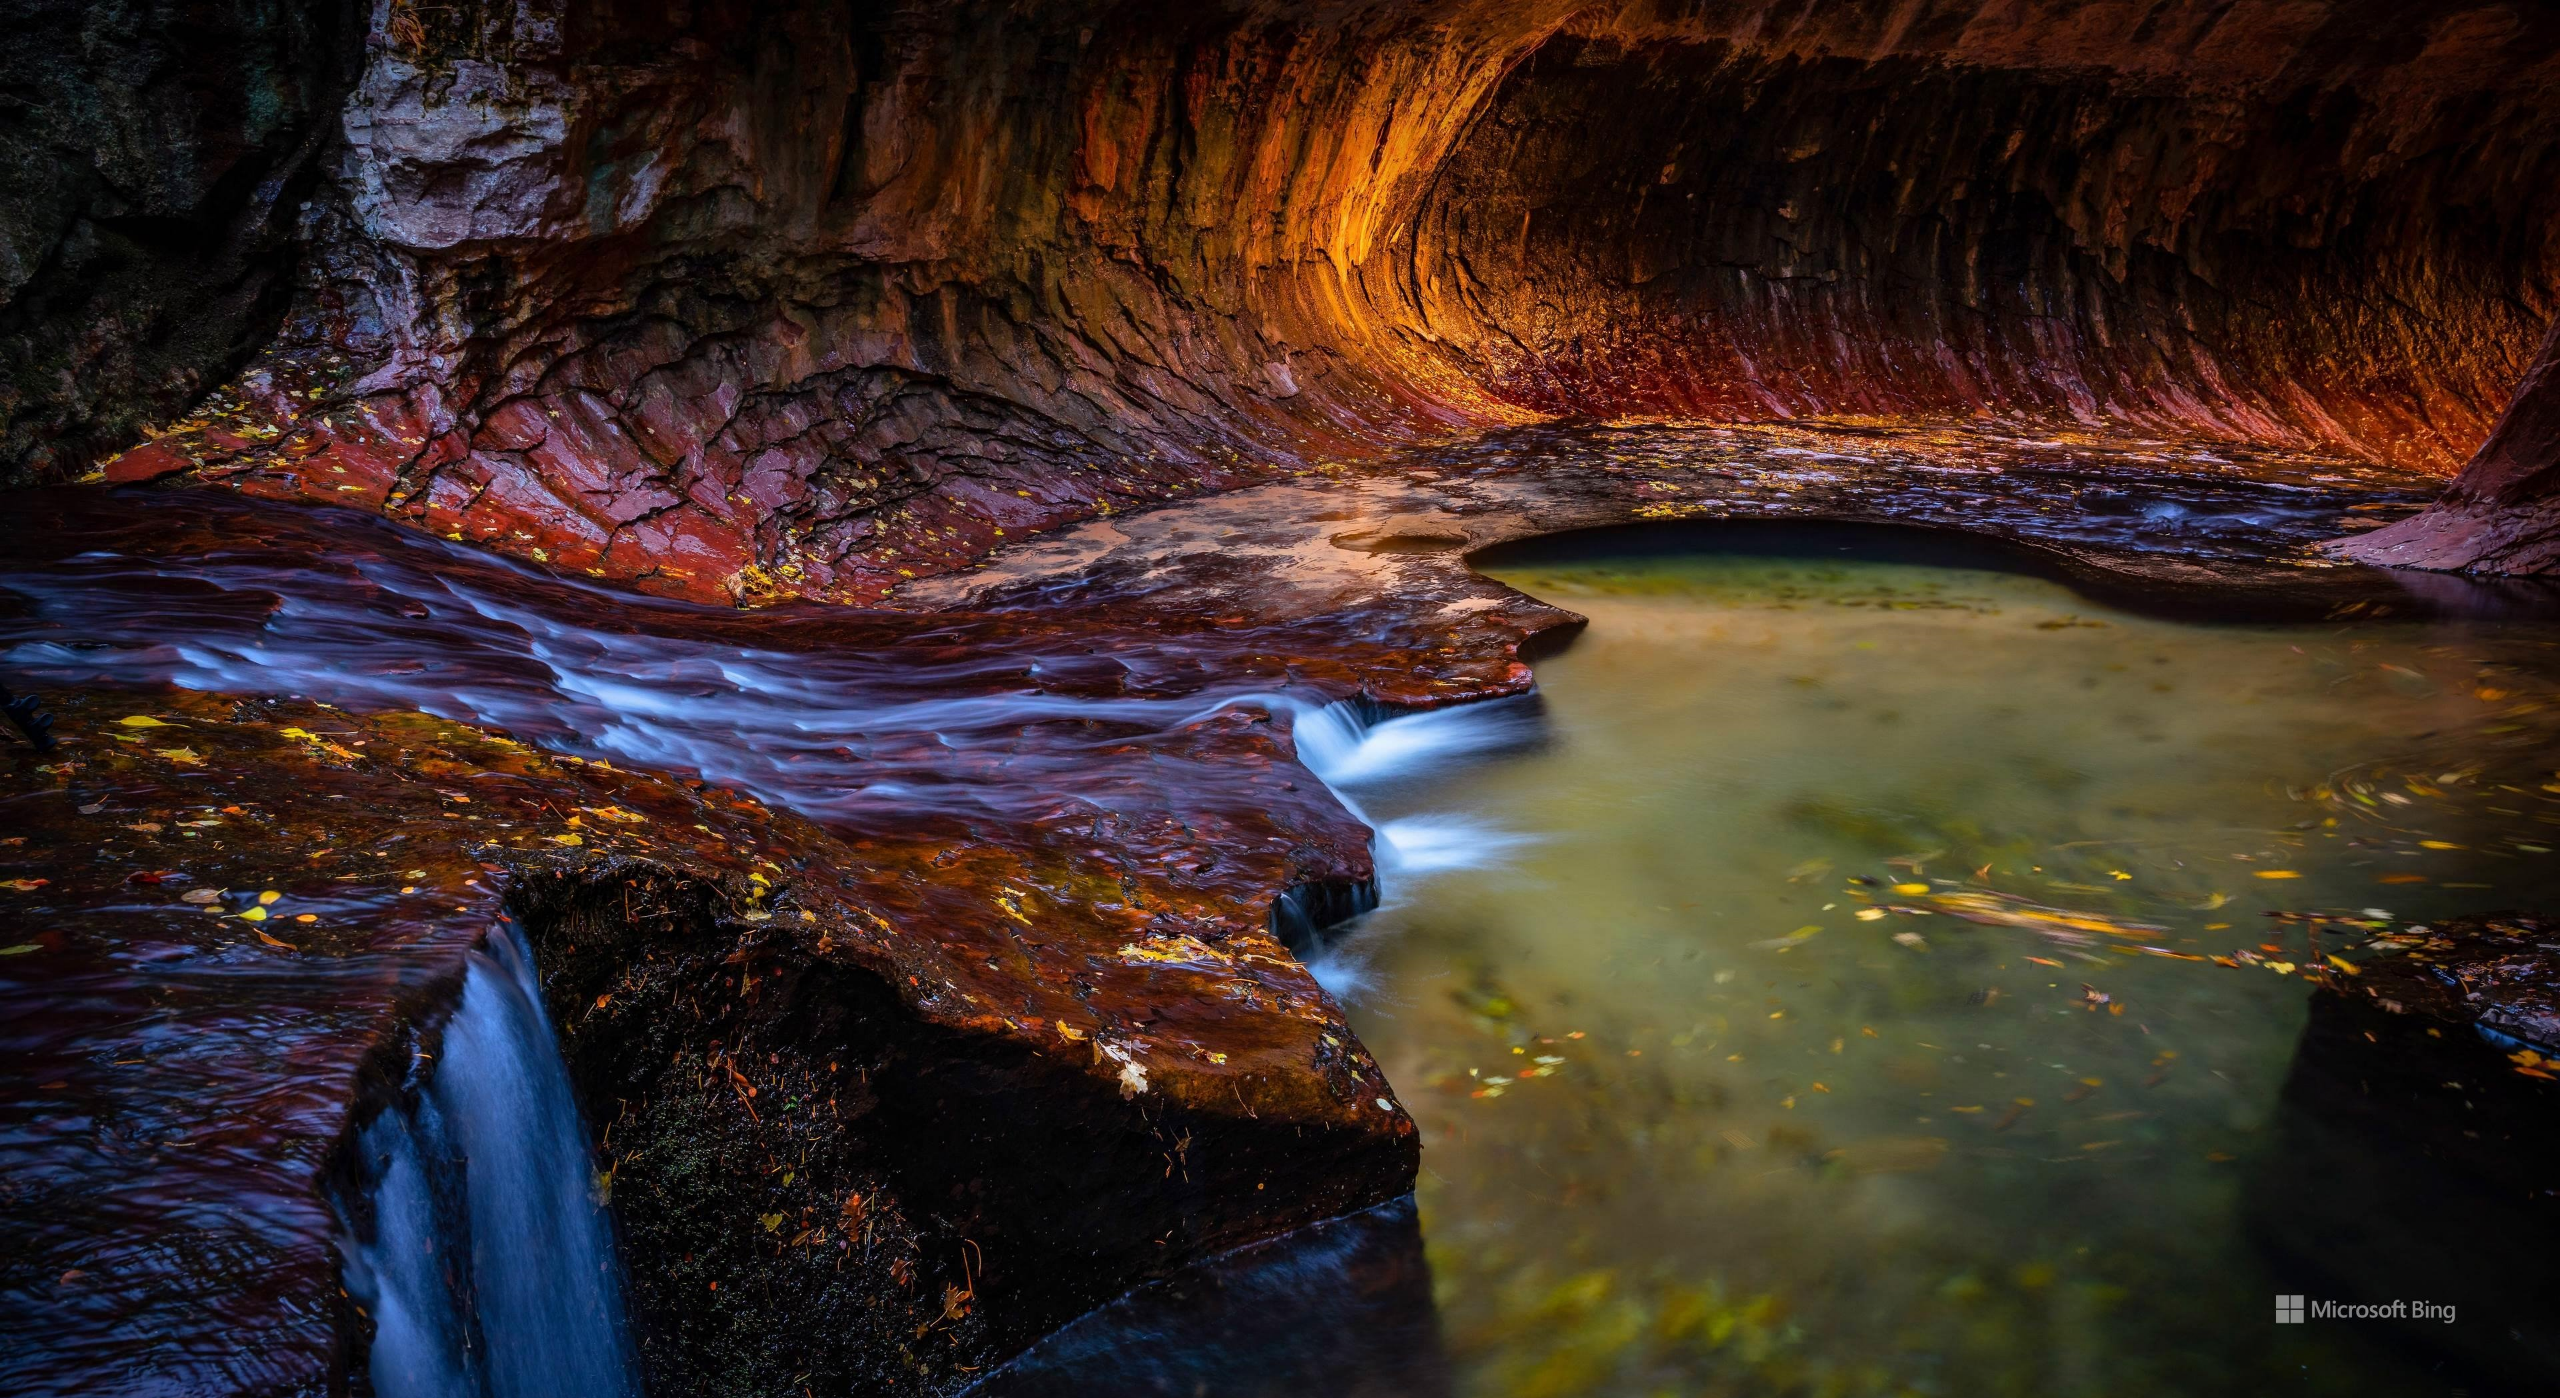

Selected image: BW 2021-11-19 075601.png


In [10]:
import os
import random
from IPython.display import Image, display

# Set the path to the folder containing images
folder_path = '/content/images'

# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"The folder '{folder_path}' does not exist.")
else:
    # List all files in the folder
    files = os.listdir(folder_path)

    # Filter out only image files (you can adjust the extensions as needed)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

    # Check if there are any image files in the folder
    if not image_files:
        print(f"No image files found in '{folder_path}'.")
    else:
        # Select a random image
        selected_image = random.choice(image_files)

        # Display the selected image
        image_path = os.path.join(folder_path, selected_image)
        display(Image(filename=image_path))

        print(f"Selected image: {selected_image}")


Org image shape -->  (1398, 2560, 3)
After resizing shape -->  (200, 366, 3)
Afer Flattening shape -->  (73200, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


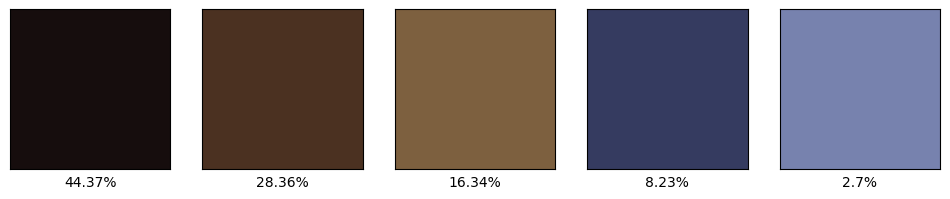

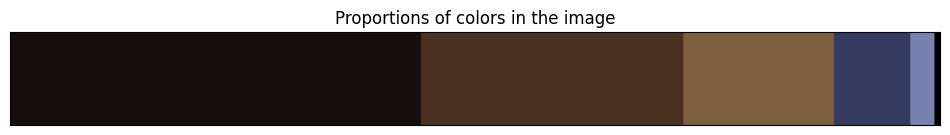

Selected image: BW 2021-11-19 075601.png


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

clusters = 5 #try different quantities

# img = cv2.imread('/content/drive/MyDrive/Fare Thee Well.jpg')
img = cv2.imread(selected_image)

org_img = img.copy()
print('Org image shape --> ',img.shape)

img = imutils.resize(img, height=200)
print('After resizing shape --> ',img.shape)

flat_img = np.reshape(img, (-1,3))
print('Afer Flattening shape --> ',flat_img.shape)

kmeans = KMeans(n_clusters=clusters, random_state=0)
kmeans.fit(flat_img)

dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

percentages = (np.unique(kmeans.labels_, return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages, dominant_colors)
p_and_c = sorted(p_and_c, reverse=True)

block = np.ones((50,50,3), dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
  plt.subplot(1, clusters, i+1)
  block[:] = p_and_c[i][1][::-1]
  plt.imshow(block)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

bar = np.ones((50,500,3), dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p, c in p_and_c:
  end = start+int(p*bar.shape[1])
  if i == clusters:
    bar[:, start:] = c[::-1]
  else:
    bar[:, start:end] = c[::-1]
    start = end
    end += 1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])

rows = 1000
cols = int((org_img.shape[0]/org_img.shape[1])*rows)
img = cv2.resize(org_img,dsize=(rows,cols), interpolation=cv2.INTER_LINEAR)

copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20

plt.show()

# cv2.imshow('img', final) - not compatible with Colab
cv2.waitKey(0)
# cv2.destroyALLWindows() - not compatible with Colab
cv2.imwrite('output.png', final)

print(f"Selected image: {selected_image}")

Code assist by Abhishek Sharma [**X**](https://machinelearningprojects.net/most-dominant-colors-in-an-image/#google_vignette)